In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.model.instance_hardness import *
from src.utils import *
from src.visualization.plots import *
from src.model.dkdn import *

np.random.seed(1234)

n = 1000

mu1, mu2, sigma = 0, -2, 1

X1 = np.random.normal(mu1, sigma, size=[n, 2])
X2 = np.random.normal(mu2, sigma, size=[n, 2])
X3 = np.random.normal([-2, 2], 0.5, size=[n, 2])
X = np.vstack((X1, X2, X3))

y = np.hstack((np.zeros(int(len(X1))),np.ones(int(len(X2) + len(X3))))).astype(int)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Conjunto de datos de train

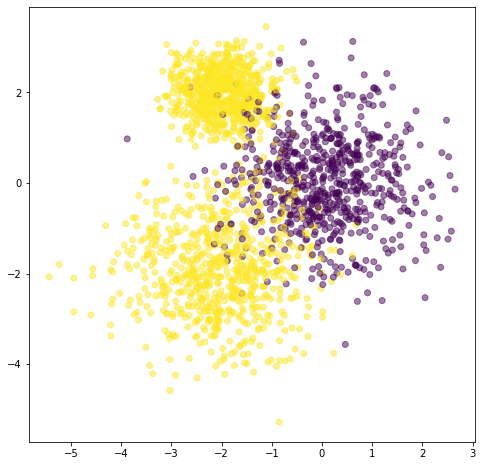

In [4]:
figure, axes = plt.subplots(figsize=[8, 8])

plt.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.5)

plt.show()

### Cálculo de complejidad

#### KDN

In [5]:
complexity, _ = kdn_score(X_train, y_train, 5)

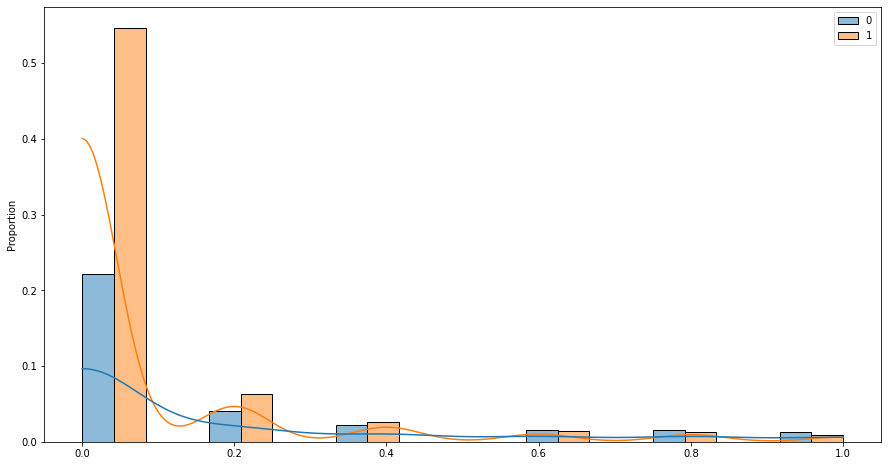

In [6]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [7]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [8]:
global_complexity

0.10238805970149255

In [9]:
class1_complexity

0.07505551443375277

In [10]:
class0_complexity

0.15842185128983308

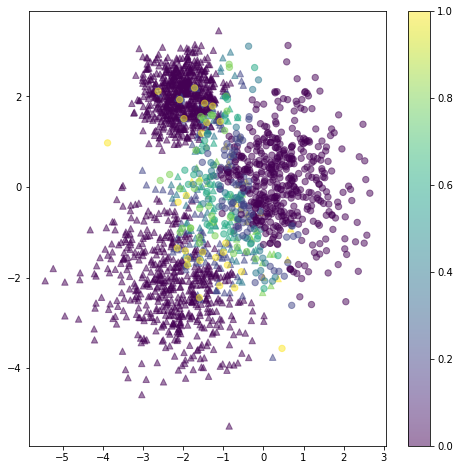

In [11]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [12]:
dynamic_kdn = DkDN(k=3)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [13]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    2010.000000
mean        0.104184
std         0.233495
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

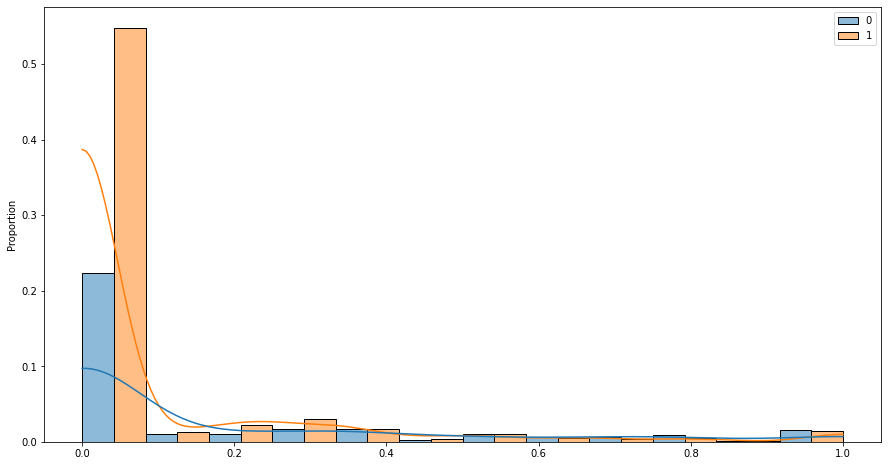

In [14]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [61]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [62]:
global_complexity_d

0.10418407960199005

In [63]:
class1_complexity_d

0.0773501110288675

In [64]:
class0_complexity_d

0.159195751138088

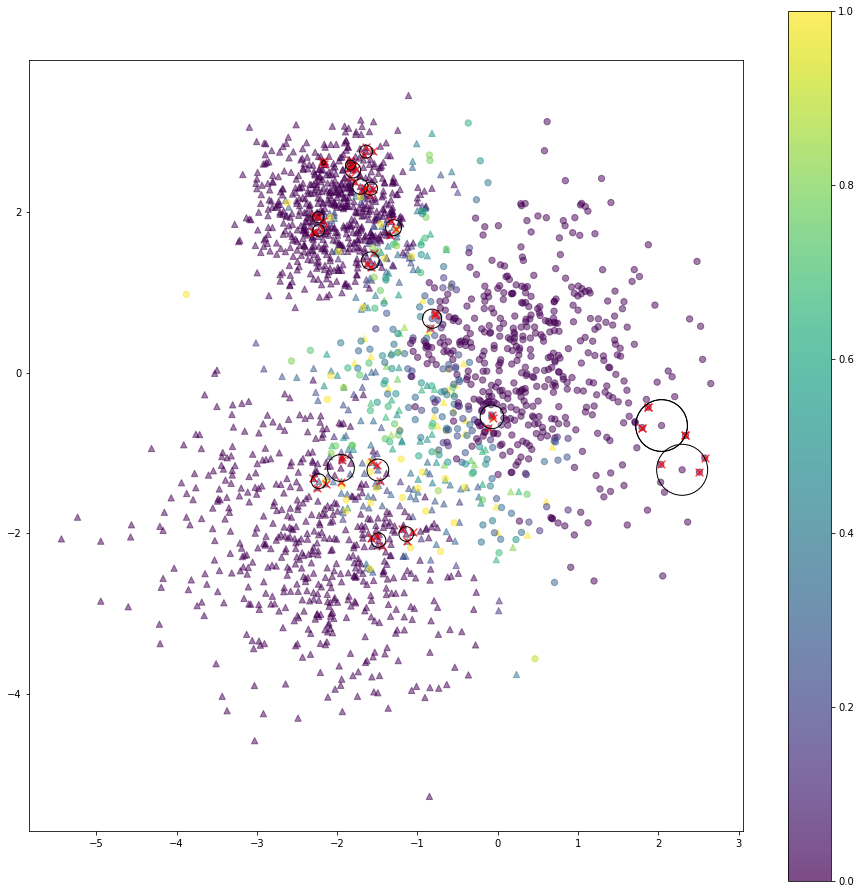

In [65]:
figure, axes = plt.subplots(figsize=[16, 16])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in np.random.randint(100, size=20):
    plt.scatter(X_train[dynamic_kdn.support_neighbours[i]][:, 0], X_train[dynamic_kdn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [66]:
dynamic_kdn = DkDN(k=3)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [67]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    2010.000000
mean        0.082383
std         0.183757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.870000
dtype: float64

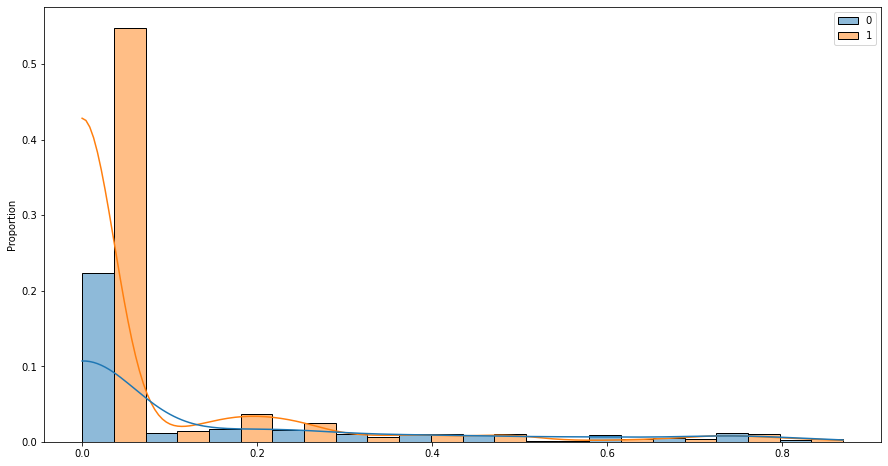

In [68]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [70]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [71]:
global_complexity_d

0.08238308457711443

In [72]:
class1_complexity_d

0.06111028867505552

In [73]:
class0_complexity_d

0.1259939301972686

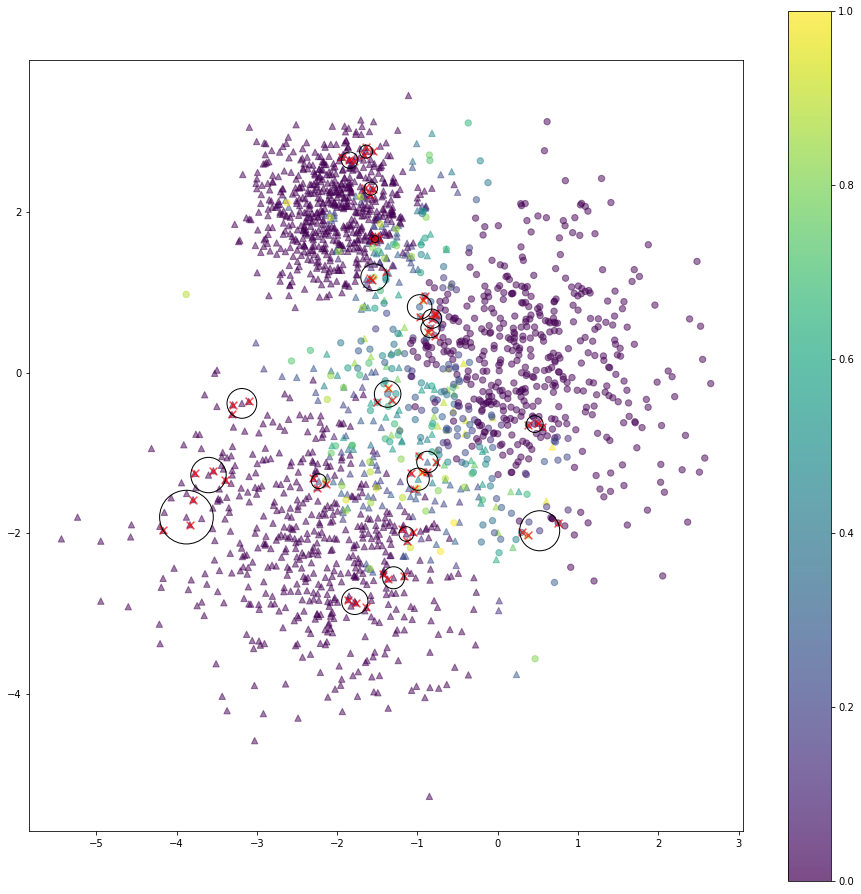

In [75]:
figure, axes = plt.subplots(figsize=[16, 16])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in np.random.randint(100, size=20):
    plt.scatter(X_train[dynamic_kdn.support_neighbours[i]][:, 0], X_train[dynamic_kdn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()